In [3]:
# -----------------------------
# 0. Setup
# -----------------------------
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")  # clean plot style

# Load the Penguins dataset
penguins = sns.load_dataset("penguins")
df = penguins.copy()

# Quick overview
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all'))


Shape: (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


None

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


,Missing,% Missing
species,0,0.0
island,0,0.0
bill_length_mm,0,0.0
bill_depth_mm,0,0.0
flipper_length_mm,0,0.0
body_mass_g,0,0.0
sex,0,0.0



Column: species
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Column: island
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

Column: sex
sex
Male      179
Female    165
Name: count, dtype: int64


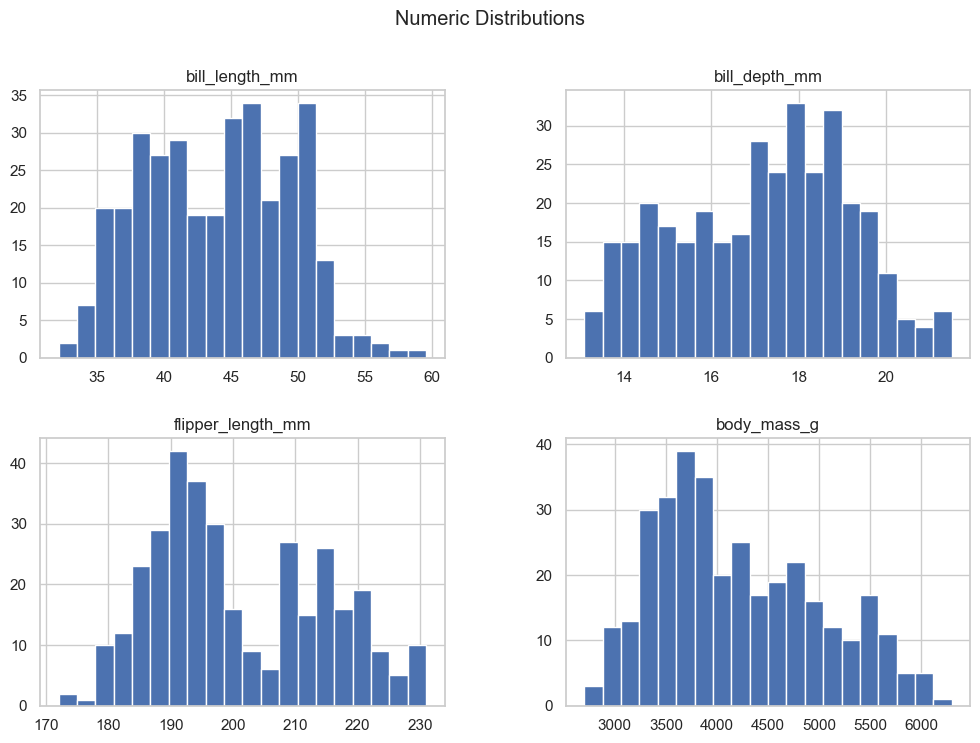

In [8]:
# -----------------------------
# 1. Exploratory Data Analysis (EDA)
# -----------------------------
# Missing values
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100
eda_missing = pd.DataFrame({'Missing': missing, '% Missing': missing_percent})
display(eda_missing)

# Unique values for categorical columns
for col in df.select_dtypes(include=['object', 'category']):
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

# Check distributions for numeric columns
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Numeric Distributions")
plt.show()


In [10]:
# -----------------------------
# 2. Cleaning
# -----------------------------
# Handle missing values: fill numeric with median, categorical with mode
for col in df.columns:
    if df[col].isna().sum() > 0:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Fill numeric columns with median
            df[col].fillna(df[col].median(), inplace=True)
        else:
            # Fill categorical/object columns with mode (most frequent value)
            mode_value = df[col].mode()
            if not mode_value.empty:
                df[col].fillna(mode_value[0], inplace=True)

# Convert categorical columns
for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype('category')

# Rename columns to snake_case
df.columns = [c.lower().replace(' ', '_') for c in df.columns]

display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     344 non-null    float64 
 3   bill_depth_mm      344 non-null    float64 
 4   flipper_length_mm  344 non-null    float64 
 5   body_mass_g        344 non-null    float64 
 6   sex                344 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


None

In [27]:
# -----------------------------
# 3. Feature Engineering / Transform
# -----------------------------
# Example derived columns
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']  # bill length to depth ratio
df['flipper_mass_ratio'] = df['flipper_length_mm'] / df['body_mass_g']  # flipper to body mass
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_ratio,flipper_mass_ratio
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,Male,2.090909,0.048267
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,Female,2.270115,0.048947
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,Female,2.238889,0.060000
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,Male,2.569364,0.048642
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,Female,1.901554,0.055942
...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,44.45,17.3,197.0,4050.0,Male,2.569364,0.048642
340,Gentoo,Biscoe,46.80,14.3,215.0,4850.0,Female,3.272727,0.044330
341,Gentoo,Biscoe,50.40,15.7,222.0,5750.0,Male,3.210191,0.038609
342,Gentoo,Biscoe,45.20,14.8,212.0,5200.0,Female,3.054054,0.040769


In [29]:
# -----------------------------
# 4. Summarization / Aggregation
# -----------------------------
# Average numeric features by species
species_summary = df.groupby('species').agg(
    avg_bill_length=('bill_length_mm', 'mean'),
    avg_bill_depth=('bill_depth_mm', 'mean'),
    avg_flipper_length=('flipper_length_mm', 'mean'),
    avg_body_mass=('body_mass_g', 'mean'),
    count=('species', 'count')
).reset_index()

display(species_summary)

# Count of each sex
sex_count = df['sex'].value_counts()
print("\nSex distribution:")
print(sex_count)


C:\Users\C.S.T\AppData\Local\Temp\ipykernel_14276\3984070155.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  species_summary = df.groupby('species').agg(


,species,avg_bill_length,avg_bill_depth,avg_flipper_length,avg_body_mass,count
0,Adelie,38.828618,18.339474,190.000000,3702.960526,152
1,Chinstrap,48.833824,18.420588,195.823529,3733.088235,68
2,Gentoo,47.480242,15.000806,217.024194,5067.741935,124



Sex distribution:
sex
Male      179
Female    165
Name: count, dtype: int64


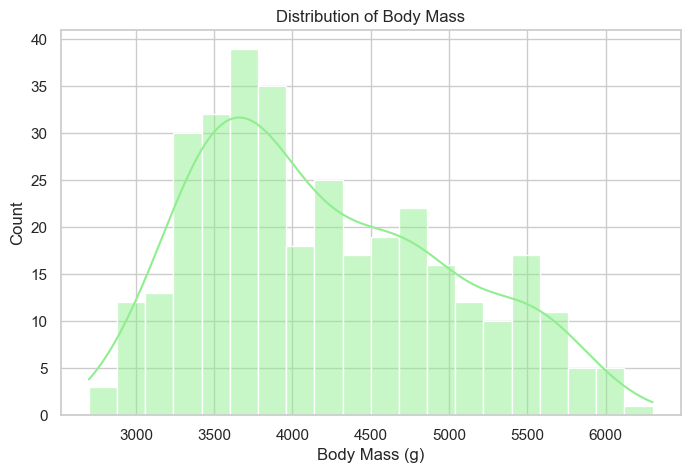

C:\Users\C.S.T\AppData\Local\Temp\ipykernel_7492\915033635.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\C.S.T\AppData\Local\Temp\ipykernel_7492\915033635.py:15: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(


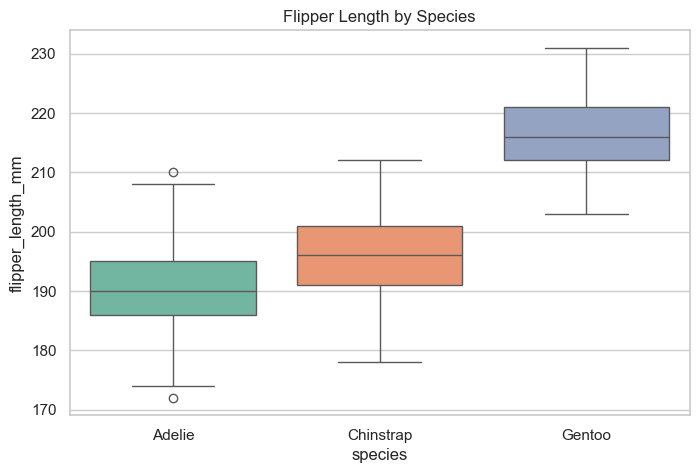

C:\Users\C.S.T\AppData\Local\Temp\ipykernel_7492\915033635.py:27: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.scatterplot(


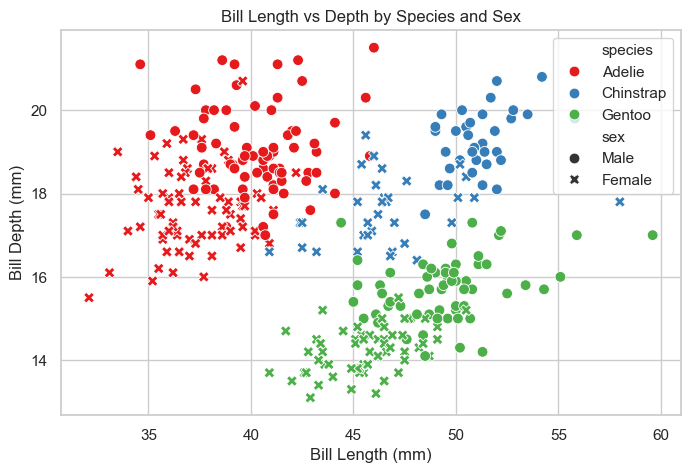

C:\Users\C.S.T\AppData\Local\Temp\ipykernel_7492\915033635.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\C.S.T\AppData\Local\Temp\ipykernel_7492\915033635.py:43: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.violinplot(


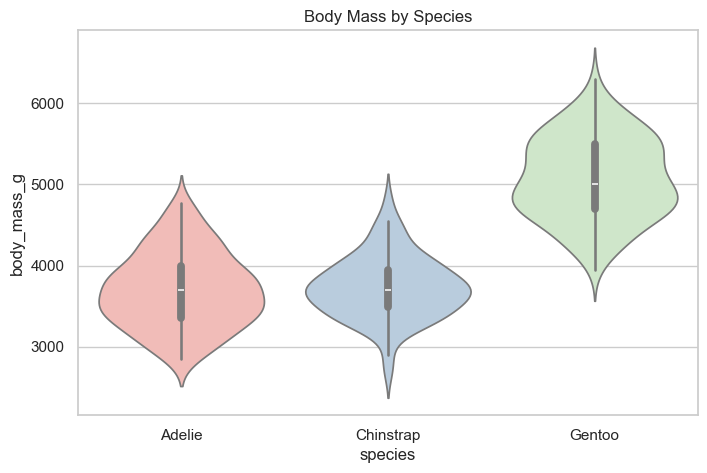

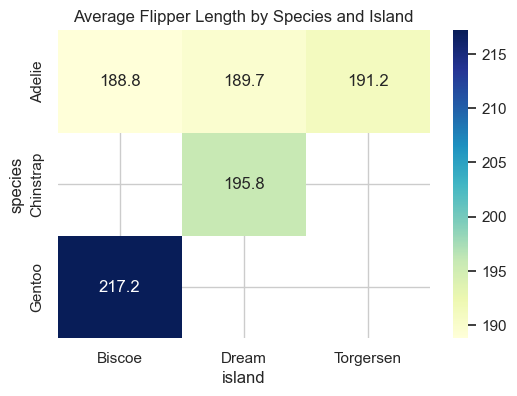

In [7]:
# -----------------------------
# 5. Visualization
# -----------------------------

# Plot 1: Distribution of body mass
plt.figure(figsize=(8, 5))
sns.histplot(df['body_mass_g'], bins=20, kde=True, color='lightgreen')
plt.title("Distribution of Body Mass")
plt.xlabel("Body Mass (g)")
plt.ylabel("Count")
plt.show()

# Plot 2: Boxplot of flipper length by species
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='species',
    y='flipper_length_mm',
    data=df,
    hue=None,  # explicitly no hue
    palette=sns.color_palette("Set2")
)
plt.title("Flipper Length by Species")
plt.show()

# Plot 3: Scatter plot bill length vs depth colored by species
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    style='sex',
    data=df,
    palette=sns.color_palette("Set1"),
    s=60
)
plt.title("Bill Length vs Depth by Species and Sex")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()

# Plot 4: Violin plot of body mass by species
plt.figure(figsize=(8, 5))
sns.violinplot(
    x='species',
    y='body_mass_g',
    data=df,
    hue=None,  # explicitly no hue
    palette=sns.color_palette("Pastel1")
)
plt.title("Body Mass by Species")
plt.show()

# Plot 5: Heatmap of average flipper length by species and island
pivot = df.pivot_table(
    index='species',
    columns='island',
    values='flipper_length_mm',
    aggfunc='mean'
)
plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("Average Flipper Length by Species and Island")
plt.show()


In [ ]:
# -----------------------------
# 6. Insights / Notes
# -----------------------------
# 1. Gentoo penguins have the largest body mass and flipper length, while Chinstrap are smallest.
# 2. Bill depth and length vary significantly between species; bill_ratio highlights shape differences.
# 3. Sex distribution is roughly balanced, but small differences exist per species.
# 4. Island location affects flipper size: Gentoos on Biscoe have longer flippers on average.
# 5. Derived metrics (bill_ratio, flipper_mass_ratio) could be useful for classification tasks.
